#PROYECTO 8 
##PUNTO 1 







In [506]:
pip install wbgapi

In [507]:
pip install wooldridge

In [508]:
import numpy as np
import pandas as pd
import wbgapi as wb
import wooldridge as wd

In [509]:
Df =  pd.read_csv('/content/UPersonas.csv', sep=','  , engine='python')

In [510]:
Df.head()

,Unnamed: 0,ola,consecutivo,llave,hogar,llave_n16,hogar_n16,orden,seguimiento,llave_ID_lb,llaveper,llaveper_n16,edad,edad_meses,edad_tot_meses,sexo,parentesco,id_dpto_nac,id_mpio_nac,pais_nac,nac_dia,nac_mes,nac_ano,embarazada,estado_civil,vive_conyuge,orden_conyuge,fecha_edad,mes_unionm,ano_unionm,edad_unionm,etnia,padre_vive,orden_padre,madre_vive,orden_madre,parent_inform,inform_orden,novedad_perso,afiliacion,...,siempre_ayuda,hace_la_paga,violar_ley,justicia_propia,uso_violencia,voto_popular,ind_bienestar,desigualdad,paga_soborno,ayu_congresista,resolvio_congres,ayu_alcalde,resolvio_alcalde,ayu_lcomunal,resolvio_lcomunal,medid1_molestan,medid2_molestan,medid3a_molestan,medid3b_molestan,medid3c_molestan,medid3d_molestan,firma_paz,evitar_iva,fuente_tv,fuente_diarios,fuente_radio,fuente_revistas,fuente_libros,fuente_internet,fuente_amigos,acepta_dinero,vr_aleatorio,vende_voto,valor_voto,voto_secreto,voto_ofrecido,nom_partido,fexpers_2010,fpers_2010,fpers_2016
0,0,3,111001,11100101.0,1.0,1.110010e+09,1,1,1,11100101.0,1.110010e+09,1.110010e+11,60,9,NaN,2,1,NaN,NaN,NaN,15,5,1955,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,0,1.0,...,1.0,4.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,,1.0,$150.000,2.0,2.0,NaN,1.095778,1552.98691,1543.77
1,1,3,111001,NaN,NaN,1.110010e+09,1,6,2,NaN,NaN,1.110010e+11,40,2,NaN,2,3,14.0,193.0,NaN,22,12,1975,2.0,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2,NaN,1,1.0,NaN,NaN,32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1543.77
2,2,3,111001,NaN,NaN,1.110010e+09,1,7,2,NaN,NaN,1.110010e+11,67,7,NaN,1,11,2.0,120.0,NaN,28,7,1948,NaN,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,3,NaN,3,NaN,NaN,NaN,21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3213.04
3,3,3,111001,NaN,NaN,1.110010e+09,1,8,2,NaN,NaN,1.110010e+11,22,0,NaN,1,5,21.0,102.0,NaN,27,2,1994,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2,NaN,1,6.0,NaN,NaN,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3175.81
4,4,3,111003,11100301.0,1.0,1.110031e+09,1,1,1,11100301.0,1.110030e+09,1.110031e+11,53,9,NaN,2,1,17.0,164.0,NaN,10,5,1962,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2,NaN,2,NaN,NaN,NaN,29,1.0,...,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,,1.0,$30.000,1.0,2.0,MOVIMIENTO SIGNIFICATIVO DE CIUDADANOS PROGRES...,1.095778,1552.98691,2600.98


In [511]:
Df.drop_duplicates

<bound method DataFrame.drop_duplicates of        Unnamed: 0  ola  consecutivo  ...  fexpers_2010   fpers_2010  fpers_2016
0               0    3       111001  ...      1.095778  1552.986910     1543.77
1               1    3       111001  ...           NaN          NaN     1543.77
2               2    3       111001  ...           NaN          NaN     3213.04
3               3    3       111001  ...           NaN          NaN     3175.81
4               4    3       111003  ...      1.095778  1552.986910     2600.98
...           ...  ...          ...  ...           ...          ...         ...
19293       19293    3       226627  ...      0.232226   329.121023      355.74
19294       19294    3       226627  ...      0.138409   196.159412      252.49
19295       19295    3       226627  ...           NaN          NaN      243.07
19296       19296    3       226627  ...           NaN          NaN      210.30
19297       19297    3       226627  ...           NaN          NaN      210.

In [512]:
Df['vr_salario'] = Df['vr_salario'].fillna('No')

In [513]:
Base = Df[Df['vr_salario'] != 'No']

In [514]:
Base['vr_salario']

7        1.026e+06
9           750000
17          689000
18         1.5e+06
25          700000
           ...    
19264        1e+06
19265       690000
19266       900000
19274       679000
19279       689400
Name: vr_salario, Length: 2692, dtype: object

In [515]:
Base['afiliacion'] = Base['afiliacion'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [516]:
Base['afiliacion'].shape

(2692,)

In [517]:
Base['llave'] = Base['llave'].isna()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [518]:
Base = Base[Base['llave'] == False]

In [519]:
Base['Total_hijos'] = Base['hijos_hombres']+ Base['hijas_mujeres']

In [520]:
Base['Total_hijos'] = Base['Total_hijos'].fillna(0)

In [521]:
Base['Total_hijos']

7        2.0
9        0.0
17       0.0
18       0.0
25       0.0
        ... 
19264    0.0
19265    0.0
19266    0.0
19274    3.0
19279    4.0
Name: Total_hijos, Length: 2425, dtype: float64

In [522]:
Base['edad']#= Df['edad']>=12 # Personas en edad de trabajar 
#Df = Df[Df['edad'] == True]

7        30
9        31
17       32
18       37
25       59
         ..
19264    35
19265    54
19266    39
19274    27
19279    43
Name: edad, Length: 2425, dtype: int64

In [523]:
Base['nivel_educ'].isna().sum()

2234

In [524]:
2234/2692 # Base.shape 

0.8298662704309064

In [525]:
Base

,Unnamed: 0,ola,consecutivo,llave,hogar,llave_n16,hogar_n16,orden,seguimiento,llave_ID_lb,llaveper,llaveper_n16,edad,edad_meses,edad_tot_meses,sexo,parentesco,id_dpto_nac,id_mpio_nac,pais_nac,nac_dia,nac_mes,nac_ano,embarazada,estado_civil,vive_conyuge,orden_conyuge,fecha_edad,mes_unionm,ano_unionm,edad_unionm,etnia,padre_vive,orden_padre,madre_vive,orden_madre,parent_inform,inform_orden,novedad_perso,afiliacion,...,hace_la_paga,violar_ley,justicia_propia,uso_violencia,voto_popular,ind_bienestar,desigualdad,paga_soborno,ayu_congresista,resolvio_congres,ayu_alcalde,resolvio_alcalde,ayu_lcomunal,resolvio_lcomunal,medid1_molestan,medid2_molestan,medid3a_molestan,medid3b_molestan,medid3c_molestan,medid3d_molestan,firma_paz,evitar_iva,fuente_tv,fuente_diarios,fuente_radio,fuente_revistas,fuente_libros,fuente_internet,fuente_amigos,acepta_dinero,vr_aleatorio,vende_voto,valor_voto,voto_secreto,voto_ofrecido,nom_partido,fexpers_2010,fpers_2010,fpers_2016,Total_hijos
7,7,3,111003,False,5.0,1.110031e+09,1,4,2,11100304.0,1.110031e+09,1.110031e+11,30,5,NaN,2,3,NaN,NaN,NaN,13,9,1985,2.0,1,1.0,6.0,NaN,NaN,NaN,NaN,NaN,3,NaN,1,1.0,NaN,4.0,0,1.0,...,3.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,,2.0,$50.000,2.0,2.0,MOVIMIENTO SIGNIFICATIVO DE CIUDADANOS PROGRES...,0.989732,1402.693654,1589.85,2.0
9,9,3,111003,False,5.0,1.110031e+09,1,6,2,11100306.0,1.110031e+09,1.110031e+11,31,10,NaN,1,11,NaN,NaN,NaN,16,4,1984,NaN,1,1.0,4.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,6.0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.184795,1679.145590,2538.97,0.0
17,17,3,111006,False,1.0,1.110060e+09,1,4,2,NaN,1.110060e+09,1.110060e+11,32,7,NaN,1,1,NaN,NaN,NaN,25,7,1983,NaN,2,1.0,1.0,2.0,NaN,NaN,21.0,NaN,2,NaN,2,NaN,NaN,1.0,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538.97,0.0
18,18,3,111009,False,1.0,1.110090e+09,1,1,1,11100901.0,1.110090e+09,1.110090e+11,37,5,NaN,1,1,NaN,NaN,NaN,27,9,1978,NaN,2,1.0,2.0,2.0,NaN,NaN,21.0,NaN,3,NaN,3,NaN,NaN,NaN,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394932,559.715155,846.32,0.0
25,25,3,111011,False,1.0,1.110110e+09,1,1,1,11101101.0,1.110110e+09,1.110110e+11,59,3,NaN,1,1,NaN,NaN,NaN,10,11,1956,NaN,2,1.0,2.0,2.0,NaN,NaN,27.0,NaN,3,NaN,3,NaN,NaN,NaN,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361549,512.404173,745.68,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,19264,3,226618,False,1.0,2.266180e+09,1,1,1,22661801.0,2.266180e+09,2.266180e+11,35,7,NaN,1,1,NaN,NaN,NaN,24,8,1980,NaN,1,1.0,2.0,2.0,NaN,NaN,22.0,NaN,2,NaN,2,NaN,NaN,NaN,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165316,234.293316,174.34,0.0
19265,19265,3,226618,False,1.0,2.266180e+09,1,2,1,22661802.0,2.266180e+09,2.266180e+11,54,7,NaN,2,2,NaN,NaN,NaN,25,8,1961,NaN,1,1.0,1.0,2.0,NaN,NaN,42.0,NaN,3,NaN,3,NaN,NaN,NaN,0,1.0,...,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,,2.0,$10.000,2.0,2.0,NaN,0.207613,294.239133,184.79,0.0
19266,19266,3,226619,False,1.0,2.266190e+09,1,1,1,22661901.0,2.266190e+09,2.266190e+11,39,5,NaN,1,1,NaN,NaN,NaN,6,10,1976,NaN,2,1.0,2.0,2.0,NaN,NaN,23.0,NaN,2,NaN,2

In [526]:
Base['estado_civil']

7        1
9        1
17       2
18       2
25       2
        ..
19264    1
19265    1
19266    2
19274    5
19279    2
Name: estado_civil, Length: 2425, dtype: int64

In [527]:
Base['tipo_contrato'].isna()

7        False
9        False
17       False
18       False
25       False
         ...  
19264    False
19265    False
19266    False
19274    False
19279    False
Name: tipo_contrato, Length: 2425, dtype: bool

In [528]:
Base['horas_normal']

7        48.0
9        50.0
17       48.0
18       48.0
25       84.0
         ... 
19264    48.0
19265    56.0
19266    82.0
19274    48.0
19279    48.0
Name: horas_normal, Length: 2425, dtype: float64

In [529]:
Base['n_empleados']

7        6.0
9        6.0
17       6.0
18       2.0
25       2.0
        ... 
19264    6.0
19265    6.0
19266    2.0
19274    6.0
19279    6.0
Name: n_empleados, Length: 2425, dtype: float64

In [530]:
Base['Total_hijos']

7        2.0
9        0.0
17       0.0
18       0.0
25       0.0
        ... 
19264    0.0
19265    0.0
19266    0.0
19274    3.0
19279    4.0
Name: Total_hijos, Length: 2425, dtype: float64

In [531]:
Base['vr_salario'] = Base['vr_salario'].astype(int)

In [532]:
Base['estado_civil'] = Base['estado_civil'].astype(int)

In [533]:
Base['tipo_contrato'] = Base['tipo_contrato'].fillna(0)

In [534]:
Base['tipo_contrato'] = Base['tipo_contrato'].astype(int)

In [535]:
Base['n_empleados'] = Base['n_empleados'].fillna(0)

In [536]:
Base['n_empleados'] = Base['n_empleados'].astype(int)

In [537]:
Base['estado_civil'] = Base['estado_civil'].astype(int)

In [538]:
Base['Total_hijos'] = Base['Total_hijos'].astype(int)

In [539]:
Base['afiliacion'] = Base['afiliacion'].astype(int)

In [540]:
Base_total = Base.loc[:, ['edad','sexo','estado_civil','Total_hijos', 'tipo_contrato', 'afiliacion', 'n_empleados', 'vr_salario']] #BASE FINAL

## Punto 2

Filtre el dataset seleccionando únicamente siete variables que considere relevantes para explicar la variable 'vr_salario'. (Una ayuda: edad, sexo y estado_civil, deben ser las primeras tres). Justifique la selección.

Se tomó la variable 'Total_hijos' = Es la suma de las variables 'hijos_hombres' e 'hijas_mujeres'. Tambien se seleccionaron variables como 'tipo_contrato' y 'n_empleados' ya que ellas pueden explicar el valor del salario. 
Segun Edgar Silva Quintero quien realizo un master en economia en la Universidad de Zaragoza escribió que los principales factores determinantes de los salarios en
Colombia son aquellas variables anteriormente nombradas. Por ejemplo, él afirma que las empresas con mayor número de trabajadores pagan salarios más elevados por contar con personal más cualificado o por compensar a sus trabajadores por ofrecer puestos de trabajo más desagradables con un ambiente laboral inadecuado. 
Por otra parte, el tipo de contrato utilizado puede afectar la variable salario al momento de determinar si es un contrato verbal, contrato escrito a término
indefinido o contrato escrito a término fijo.
Variables como sexo, edad y estado civil se usaran para hacer comparaciones e identificar quienes tienen mayor o menor salario.

Para explicar mejor el porque de la seleccion de estas variables se hace a continucion un analisis exploratorio de datos en el punto 3

## Punto 3

In [541]:
import matplotlib.pyplot as plt 
import seaborn as sns

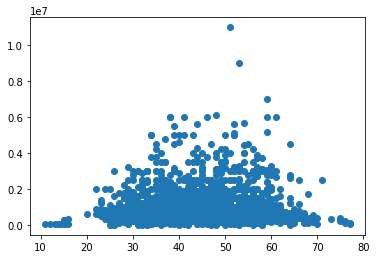

In [542]:
plt.scatter(Base['edad'],Base['vr_salario'])

In [543]:
print('Correlación Pearson: ', Base['vr_salario'].corr(Base['edad'], method='pearson'))

Correlación Pearson:  0.09164258436598234


In [544]:
pip install pingouin

In [545]:
import pingouin as pg

In [546]:
display(pg.corr(Base['vr_salario'], Base['horas_normal'], method='pearson')) #NO TIENEN UNA CORRELACION LINEAL

,n,r,CI95%,p-val,BF10,power
pearson,2425,0.096472,"[0.06, 0.14]",0.000002,2095.821,0.997473


In [547]:
display(pg.corr(Base['vr_salario'], Base['edad'], method='pearson')) #NO TIENEN UNA CORRELACION LINEAL

,n,r,CI95%,p-val,BF10,power
pearson,2425,0.091643,"[0.05, 0.13]",0.000006,690.944,0.994822


In [548]:
Base_total

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
7,30,2,1,2,1,1,6,1026000
9,31,1,1,0,2,1,6,750000
17,32,1,2,0,2,1,6,689000
18,37,1,2,0,3,1,2,1500000
25,59,1,2,0,3,1,2,700000
...,...,...,...,...,...,...,...,...
19264,35,1,1,0,1,1,6,1000000
19265,54,2,1,0,1,1,6,690000
19266,39,1,2,0,2,1,2,900000
19274,27,2,5,3,1,1,6,679000


Una vez filtrada realice un análisis exploratorio corto de la información.

- Se estudiaran 2.425 individuos.


In [549]:
Base_total.describe()

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2.425000e+03
mean,43.050309,1.502680,2.082474,0.845773,2.315052,1.014845,4.063093,1.025963e+06
std,10.441292,0.500096,1.178658,1.349171,1.076547,0.178767,1.987933,9.014944e+05
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03
25%,35.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,6.000000e+05
50%,42.000000,2.000000,2.000000,0.000000,2.000000,1.000000,5.000000,7.500000e+05
75%,51.000000,2.000000,3.000000,2.000000,3.000000,1.000000,6.000000,1.200000e+06
max,77.000000,2.000000,5.000000,9.000000,4.000000,2.000000,6.000000,1.100000e+07


EDAD
- Se puede decir que la edad promedio de los individuos estudiados es de aproximadamente 43 años.
- La edad minima y maxima esta representada por 11 y 44 años respectivamente.
- La mitad de los individuos tienen una edad inferior o igual a 42 años.

SALARIO
- Se puede decir que el salario promedio de los individuos estudiados es de aproximadamente 1.025.963 pesos. Esta encima del salario minimo $ 689.455 para el año 2016.
- El salario minimo y maximo corresponden a 5000 pesos y 11.000.000 pesos respectivamente.
- La mitad de individuos tienen un salario aproximadamente de 750.000 pesos.
- La variabilidad de los datos se ve representada por 

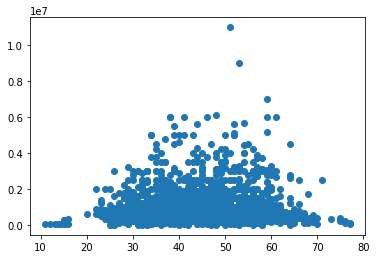

In [550]:
plt.scatter(Base['edad'], Base['vr_salario'])
plt.show()

Se puede decir que la edad no es una variable que sea altamente influyente en el salario.

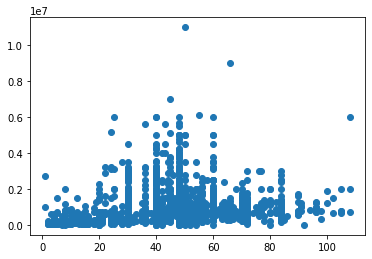

In [551]:
plt.scatter(Base['horas_normal'], Base['vr_salario'])
plt.show()

In [552]:
estado_civil1 = Base_total.loc[:, 'estado_civil'] == 1
df_est1 = Base_total.loc[estado_civil1]
df_est1['vr_salario'].mean()

930306.5403050109

In [553]:
estado_civil2 = Base_total.loc[:, 'estado_civil'] == 2
df_est2 = Base_total.loc[estado_civil2]
df_est2['vr_salario'].mean()

1293132.6639439906

In [554]:
estado_civil3 = Base_total.loc[:, 'estado_civil'] == 3
df_est3 = Base_total.loc[estado_civil3]
df_est3['vr_salario'].mean()

809697.6907216494

In [555]:
estado_civil4 = Base_total.loc[:, 'estado_civil'] == 4
df_est4 = Base_total.loc[estado_civil4]
df_est4['vr_salario'].mean()

807223.2142857143

In [556]:
estado_civil5 = Base_total.loc[:, 'estado_civil'] == 5
df_est5 = Base_total.loc[estado_civil5]
df_est5['vr_salario'].mean()

807557.5436893204

In [557]:
ul= list(df_est1['vr_salario'])
cas = list(df_est2['vr_salario'])
sep = list(df_est3['vr_salario'])
viud = list(df_est4['vr_salario'])
sol = list(df_est5['vr_salario'])

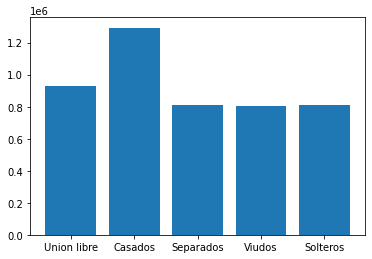

In [558]:
x= [930306,1293132,809697,807223,807557]
cc = ['Union libre','Casados','Separados','Viudos', 'Solteros']
plt.bar(cc, x)
plt.show()

De acuerdo al grafico anterior se puede decir que en promedio el salario que obtienen los individuos que estan separados, viudos o solteros no tienen cambios significativos. Sin embargo, aquellas personas que estan casadas tienden a tener en promedio un salario mas elevado. 

In [559]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [560]:
#enter data for three groups
ul= list(df_est1['vr_salario'])
cas = list(df_est2['vr_salario'])
sep = list(df_est3['vr_salario'])
viud = list(df_est4['vr_salario'])
sol = list(df_est5['vr_salario'])


#perform one-way ANOVA
f_oneway(ul, cas, sep , viud , sol)

F_onewayResult(statistic=32.430243980466265, pvalue=2.2739404133283356e-26)

In [561]:
len(ul)

918

In [562]:
len(cas)

857

In [563]:
len(sep)

388

In [564]:
len(viud)

56

In [565]:
len(sol)

206

In [566]:
total = ul + cas + sep + viud + sol

Hay almenos una media que es diferente.

In [567]:
import pandas as pd
import scipy.stats as stats

In [568]:
from scipy.stats import ttest_ind
ttest_ind(ul, cas)


Ttest_indResult(statistic=-8.232438116808398, pvalue=3.5147362272127786e-16)

La media de los salarios de las personas que tienen como estado civil 'Union libre' es estadisticamente diferente a los individuos que tienen como estado civil 'Casados'

In [569]:
ttest_ind(cas,viud)

Ttest_indResult(statistic=3.3197952569130793, pvalue=0.0009365901650271268)

La media de los salarios de las personas que tienen como estado civil 'Viudos' es estadisticamente diferente a los individuos que tienen como estado civil 'Casados'

In [570]:
ttest_ind(sep,viud)

Ttest_indResult(statistic=0.022585621857997187, pvalue=0.9819910054192327)

In [571]:
ttest_ind(viud,sol)

Ttest_indResult(statistic=-0.003042813173550444, pvalue=0.9975745234130997)

En cambio, la media de los salarios de las personas que tienen como estado civil 'Separados' no es significativamente diferente a la media de los salarios de los invidiuos que estan viudos y que estan solteros.

In [572]:
from statsmodels.stats.multicomp import MultiComparison


In [573]:
import numpy as np
from scipy import stats
from scipy.stats import expon
import matplotlib.pyplot as plt

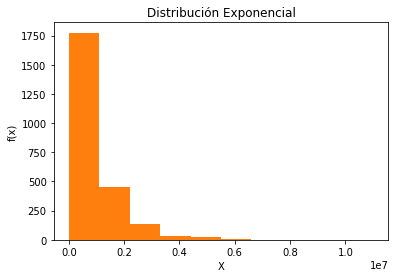

In [574]:
#  Parece que sigue una distribucion exponencial
fig, axes = plt.subplots(1,1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
plt.plot(x, expon.pdf(x))
plt.title('Distribución Exponencial')
plt.ylabel('f(x)')
plt.xlabel('X')
plt.hist(Base['vr_salario'])
plt.show()

In [575]:
# Calculando la simetria con scipy
stats.skew(Base['vr_salario'])

3.0268641924106943

Para el caso del salario podemos ver que la distribución  tiene una asimetria positiva. Lo que indica que el salario tiende hacia valores menores que la media. 

In [576]:
import numpy as np
import pandas as pd

In [577]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns

(array([  78.,  110.,  156.,  298., 1187.,  317.,  156.,   86.,   24.,
          13.]),
 array([  1. ,  11.7,  22.4,  33.1,  43.8,  54.5,  65.2,  75.9,  86.6,
         97.3, 108. ]),
 <a list of 10 Patch objects>)

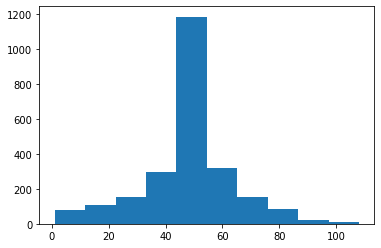

In [578]:
plt.hist(Base['horas_normal']) #parece que sigue una distribucion normal


In [579]:
# Calculando la simetria con scipy
stats.skew(Base['horas_normal']) #PRESENTA UN POCO DE ASIMETRIA NEGATIVA. 

-0.029131728000133625

(array([ 21.,  15., 228., 570., 453., 500., 420., 161.,  49.,   8.]),
 array([11. , 17.6, 24.2, 30.8, 37.4, 44. , 50.6, 57.2, 63.8, 70.4, 77. ]),
 <a list of 10 Patch objects>)

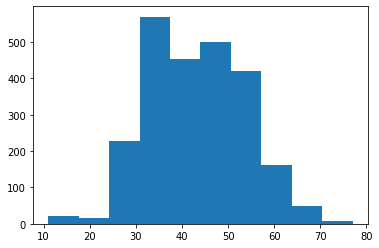

In [580]:
plt.hist(Base['edad'])

In [581]:
datos_graf = [Base['vr_salario'],Base['edad'],Base['horas_normal']]

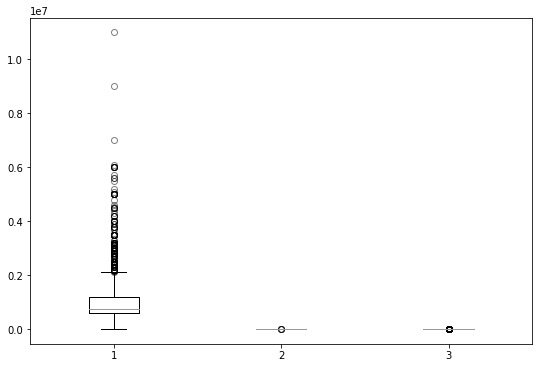

In [582]:
# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

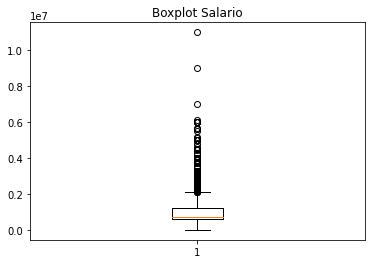

In [583]:
import matplotlib.pyplot as plt 

x=[Base['vr_salario']]

plt.boxplot(x)
plt.title("Boxplot Salario")
plt.show()

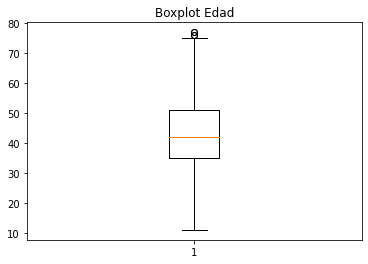

In [584]:
import matplotlib.pyplot as plt 

x=[Base['edad']]

plt.boxplot(x)
plt.title("Boxplot Edad")
plt.show()

In [585]:
#NUMERO DE EMPLEADOS
n_empleados = Base_total.loc[:, 'n_empleados'] == 1
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()


448760.99109792284

In [586]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 2
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

660794.4047619047

In [587]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 3
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

930959.0909090909

In [588]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 4
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

1003597.8101265823

In [589]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 5
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

1212192.0152091256

In [590]:
n_empleados = Base_total.loc[:, 'n_empleados'] == 6
df_emp = Base_total.loc[n_empleados]
df_emp['vr_salario'].mean()

1361552.2586037365

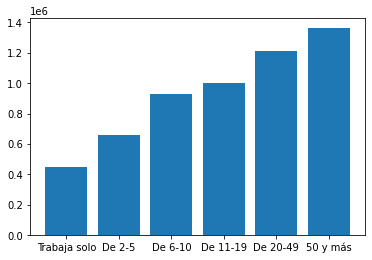

In [591]:
x= [448760,660794,930959,1003597,1212192,1361552]
cc = ['Trabaja solo','De 2-5','De 6-10','De 11-19', 'De 20-49','50 y más']
plt.bar(cc, x)
plt.show()

Se puede evidenciar que el numero de empleados influye y podria llegar a explicar la variable salario. Entre mas empleados tiene la empresa, mayor es el salario.

In [592]:
#TIPO DE CONTRATO 
tip_con = Base_total.loc[:, 'tipo_contrato'] == 1
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

1054393.4889705882

In [593]:
tip_con = Base_total.loc[:, 'tipo_contrato'] == 2
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

1419405.4426386233

In [594]:
tip_con = Base_total.loc[:, 'tipo_contrato'] == 3
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

586117.0863309352

In [595]:
tip_con = Base_total.loc[:, 'tipo_contrato'] == 4
df_tip = Base_total.loc[tip_con]
df_tip['vr_salario'].mean()

492875.8470149254

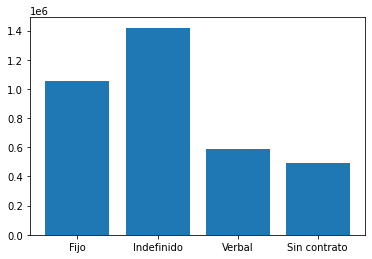

In [596]:
x= [1054393,1419405,586117,492875]
cc = ['Fijo','Indefinido','Verbal','Sin contrato']
plt.bar(cc, x)
plt.show()

Se puede evidenciar que la variable tipo de contrato si influye en la variable salario ya que, aquellos individuos que cuentan con un contrato escrito tienen un mayor salario en promedio mientras que aquellos que tienen contrato verbal o que no tienen contrato ganan mucho menos.
Aquellas personas que tienen un contrato a termino indefinido ganan mas que aquellas que tienen uno a termino fijo.

In [597]:
#HIJOS
hij = Base_total.loc[:, 'Total_hijos'] == 0
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

1129325.674613402

In [598]:
hij = Base_total.loc[:, 'Total_hijos'] == 1
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

981107.3394495413

In [599]:
hij = Base_total.loc[:, 'Total_hijos'] == 2
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

929555.1396011396

In [600]:
hij = Base_total.loc[:, 'Total_hijos'] == 3
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

706229.9651162791

In [601]:
hij = Base_total.loc[:, 'Total_hijos'] == 4
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

630957.5342465753

In [602]:
hij = Base_total.loc[:, 'Total_hijos'] == 5
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

480500.0

In [603]:
hij = Base_total.loc[:, 'Total_hijos'] == 6
df_hij = Base_total.loc[hij]
df_hij['vr_salario'].mean()

412538.46153846156

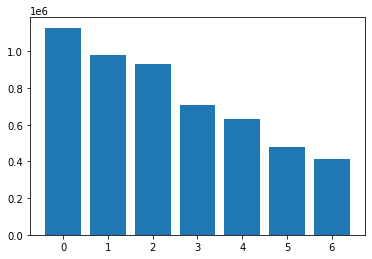

In [604]:
x= [1129325,981107,929555,706229,630957,480500,412538]
cc = ['0','1','2','3','4', '5', '6']
plt.bar(cc, x)
plt.show()

In [605]:
#afiliacion
af = Base.loc[:, 'afiliacion'] == 1
df_af = Base.loc[af]
df_af['vr_salario'].mean()

1044395.8904985087

In [606]:
af = Base.loc[:, 'afiliacion'] == 2
df_af = Base.loc[af]
df_af['vr_salario'].mean()

600228.0701754387

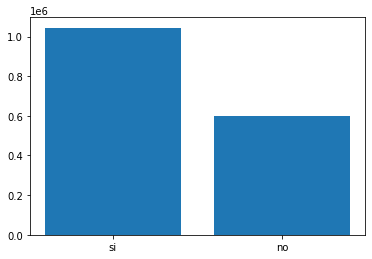

In [607]:
x= [1044395,600228]
cc = ['si','no']
plt.bar(cc, x)
plt.show()

Se puede evidenciar que la variable 'Numero total de hijos' influye en la variable salario. Existe una relacion inversamente proporcional, es decir, entre menos hijos mayor sera el salario.

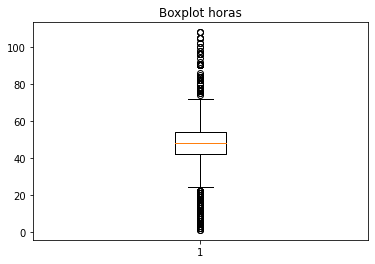

In [608]:
import matplotlib.pyplot as plt 

x=[Base['horas_normal']]

plt.boxplot(x)
plt.title("Boxplot horas")
plt.show()

In [609]:
masculino = Base_total.loc[:, 'sexo'] == 1
sum(masculino)

1206

In [610]:
femenino = Base_total.loc[:, 'sexo'] == 2
sum(femenino)

1219

In [611]:
1206 + 1219

2425

Observamos que para el caso de la variable sexo son mas las mujeres que los hombres. Tenemos un total de 1219 mujeres y 1206 hombres. 

In [612]:
df_masculino = Base_total.loc[masculino]
df_masculino

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
9,31,1,1,0,2,1,6,750000
17,32,1,2,0,2,1,6,689000
18,37,1,2,0,3,1,2,1500000
25,59,1,2,0,3,1,2,700000
53,31,1,1,0,2,1,2,600000
...,...,...,...,...,...,...,...,...
19249,43,1,2,0,1,1,6,900000
19253,38,1,1,0,2,1,6,2000000
19260,37,1,1,0,1,1,6,1022000
19264,35,1,1,0,1,1,6,1000000


In [613]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 1 #UNION LIBRE
sum(estado_hombres)

533

In [614]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 2 #CASADOS
sum(estado_hombres)

531

In [615]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 3 #SEPARADOS O DIVORCIADOS
sum(estado_hombres)

74

In [616]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 4 #VIUDO
sum(estado_hombres)

8

In [617]:
estado_hombres = df_masculino.loc[:, 'estado_civil'] == 5 #SOLTERO
sum(estado_hombres)

60

In [618]:
60+8+74+531+533

1206

In [619]:
(533/1206)*100 #UNION LIBRE

44.19568822553897

In [620]:
(531/1206)*100 #CASADOS

44.02985074626866

In [621]:
(74/1206)*100 #SEPARADOS O DIVORCIADOS

6.135986733001658

In [622]:
(8/1206)*100 #VIUDOS

0.6633499170812603

In [623]:
(60/1206)*100 #SOLTEROS

4.975124378109453

In [624]:
44.02985074626866+44.19568822553897

88.22553897180762

In [625]:
df_femenino = Base_total.loc[femenino]
df_femenino

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
7,30,2,1,2,1,1,6,1026000
36,35,2,1,2,2,1,5,1100000
41,23,2,1,2,3,1,1,500000
46,32,2,1,2,3,1,2,700000
50,50,2,2,0,4,1,2,300000
...,...,...,...,...,...,...,...,...
19230,34,2,2,2,3,1,6,320000
19246,42,2,2,2,2,1,6,2400000
19265,54,2,1,0,1,1,6,690000
19274,27,2,5,3,1,1,6,679000


In [626]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 1 #UNION LIBRE
sum(estado_mujeres)

385

In [627]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 2 #CASADAS
sum(estado_mujeres)

326

In [628]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 3 #SEPARADAS O DIVORCIADAS
sum(estado_mujeres)

314

In [629]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 4 #VIUDAS
sum(estado_mujeres)

48

In [630]:
estado_mujeres = df_femenino.loc[:, 'estado_civil'] == 5 #SOLTERAS
sum(estado_mujeres)

146

In [631]:
146+48+314+326+385

1219

In [632]:
(385/1219)*100 #UNION LIBRE

31.58326497128794

In [633]:
(326/1219)*100 #CASADAS

26.743232157506153

In [634]:
(314/1219)*100 #SEPARADAS O DIVORCIADAS

25.758818703855617

In [635]:
(48/1219)*100 #VIUDAS

3.937653814602133

In [636]:
(146/1219)*100 #SOLTERAS

11.977030352748153

In [637]:
26.743232157506153+31.58326497128794

58.32649712879409

Observamos que para el caso de la variable estado civil son más las mujeres solteras con un 11.97% con respecto a los hombres con un 4.92% y se da una mayor porcentaje de hombres casados o en union libre con un 88.22% mucho mayor que para el caso de las mujeres que fue del 58.32%. 
Asi mismo, el porcentaje de hombres divorciados o separados fue del 6,13% mientras que el de las mujeres fue del 25.75%, mas del doble.

In [638]:
import statistics as st

In [639]:
st.mean(Base['vr_salario'])

1025962.950515464

In [640]:
 df_masculino['vr_salario'].mean()

1165649.8383084578

In [641]:
 df_femenino['vr_salario'].mean()

887765.7506152584

In [642]:
1165649-887765

277884

Se puede evidenciar que los hombres tienen un salario en promedio de 1.165.649 pesos mientras que las mujeres tienen un salario promedio de 887.765 pesos. Es decir las mujeres ganan 277.884 pesos menos que los hombres en promedio.


In [643]:
import matplotlib.pyplot as plt
import numpy as np

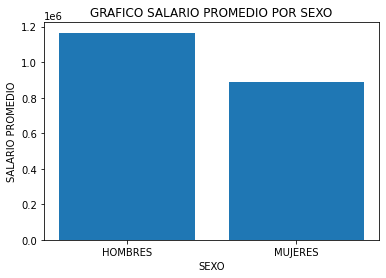

In [644]:
cc = ['HOMBRES', 'MUJERES']
data = [1165649.8383084578,887765.7506152584]
plt.bar(cc,data)
plt.title('GRAFICO SALARIO PROMEDIO POR SEXO')
plt.xlabel('SEXO')
plt.ylabel('SALARIO PROMEDIO')
plt.show()

In [645]:
 df_masculino['vr_salario'].min()

5000

In [646]:
df_masculino['vr_salario'].max()

11000000

In [647]:
df_femenino['vr_salario'].min()

5000

In [648]:
df_femenino['vr_salario'].max()

9000000

El salario minimo presentado por el sexo masculino y femenino fue de 5000 pesos. El salario maximo presentado por el sexo masculino fue de 11.000.000 pesos mientras que para el sexo femenino fue de 9.000.000 pesos.

In [649]:
df_femenino['vr_salario'].median()

690000.0

In [650]:
df_masculino['vr_salario'].median()

890000.0

El 50% de las mujeres tienen un salario menor o igual a 690.000 pesos. En cambio, el 50% de los hombres tienen un salario menor o igual a 890.000 pesos.

In [651]:
np.std(df_femenino['vr_salario'])

792132.2911543256

In [652]:
np.std(df_masculino['vr_salario'])

980008.5463608436

Los salarios de los hombres se encuentran mas dispersos que los de las mujeres. Es decir, existe mayor diferencia entre los valores de los salarios de un inviduo a otro.

## Punto 4

In [653]:
Base_total

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario
7,30,2,1,2,1,1,6,1026000
9,31,1,1,0,2,1,6,750000
17,32,1,2,0,2,1,6,689000
18,37,1,2,0,3,1,2,1500000
25,59,1,2,0,3,1,2,700000
...,...,...,...,...,...,...,...,...
19264,35,1,1,0,1,1,6,1000000
19265,54,2,1,0,1,1,6,690000
19266,39,1,2,0,2,1,2,900000
19274,27,2,5,3,1,1,6,679000


In [654]:
import pandas as pd

In [655]:
Base_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 7 to 19279
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   edad           2425 non-null   int64
 1   sexo           2425 non-null   int64
 2   estado_civil   2425 non-null   int64
 3   Total_hijos    2425 non-null   int64
 4   tipo_contrato  2425 non-null   int64
 5   afiliacion     2425 non-null   int64
 6   n_empleados    2425 non-null   int64
 7   vr_salario     2425 non-null   int64
dtypes: int64(8)
memory usage: 170.5 KB


In [656]:
Base_total["Total_hijos"] ; Base_total["n_empleados"]

7        6
9        6
17       6
18       2
25       2
        ..
19264    6
19265    6
19266    2
19274    6
19279    6
Name: n_empleados, Length: 2425, dtype: int64

In [657]:
est_dummy = pd.get_dummies(Base_total['estado_civil'], prefix = 'estado_civil')
sexo_dummy = pd.get_dummies(Base_total['sexo'], prefix = 'sexo')
contrato_dummy = pd.get_dummies(Base_total['tipo_contrato'], prefix = 'tipo_contrato')
afiliacion_dummy = pd.get_dummies(Base_total['afiliacion'], prefix = 'afiliacion')

In [658]:
Base_total = pd.concat([Base_total, est_dummy], axis = 1)
Base_total = pd.concat([Base_total, sexo_dummy], axis = 1)
Base_total = pd.concat([Base_total, contrato_dummy], axis = 1)
Base_total = pd.concat([Base_total, afiliacion_dummy], axis = 1)

In [659]:
Base_total

,edad,sexo,estado_civil,Total_hijos,tipo_contrato,afiliacion,n_empleados,vr_salario,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,sexo_1,sexo_2,tipo_contrato_0,tipo_contrato_1,tipo_contrato_2,tipo_contrato_3,tipo_contrato_4,afiliacion_0,afiliacion_1,afiliacion_2
7,30,2,1,2,1,1,6,1026000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,31,1,1,0,2,1,6,750000,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
17,32,1,2,0,2,1,6,689000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
18,37,1,2,0,3,1,2,1500000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
25,59,1,2,0,3,1,2,700000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,1,1,0,1,1,6,1000000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
19265,54,2,1,0,1,1,6,690000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
19266,39,1,2,0,2,1,2,900000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
19274,27,2,5,3,1,1,6,679000,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [660]:
Base_total_dummies = Base_total.drop(['sexo','estado_civil','tipo_contrato','afiliacion'], axis = 1)

In [661]:
 Base_total_dummies

,edad,Total_hijos,n_empleados,vr_salario,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,sexo_1,sexo_2,tipo_contrato_0,tipo_contrato_1,tipo_contrato_2,tipo_contrato_3,tipo_contrato_4,afiliacion_0,afiliacion_1,afiliacion_2
7,30,2,6,1026000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,31,0,6,750000,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
17,32,0,6,689000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
18,37,0,2,1500000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
25,59,0,2,700000,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,0,6,1000000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
19265,54,0,6,690000,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
19266,39,0,2,900000,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
19274,27,3,6,679000,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0


In [662]:
Base_total_dummies.isna().sum()

edad               0
Total_hijos        0
n_empleados        0
vr_salario         0
estado_civil_1     0
estado_civil_2     0
estado_civil_3     0
estado_civil_4     0
estado_civil_5     0
sexo_1             0
sexo_2             0
tipo_contrato_0    0
tipo_contrato_1    0
tipo_contrato_2    0
tipo_contrato_3    0
tipo_contrato_4    0
afiliacion_0       0
afiliacion_1       0
afiliacion_2       0
dtype: int64

In [663]:
#APLICACION LOGARITMO
import pandas as pd
Base_total_dummies['vr_salario'] = pd.DataFrame(np.log(Base_total_dummies['vr_salario']))

## Punto 5

In [664]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [665]:
Data = Base_total_dummies ; Data.head()

,edad,Total_hijos,n_empleados,vr_salario,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,sexo_1,sexo_2,tipo_contrato_0,tipo_contrato_1,tipo_contrato_2,tipo_contrato_3,tipo_contrato_4,afiliacion_0,afiliacion_1,afiliacion_2
7,30,2,6,13.841178,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,31,0,6,13.527828,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
17,32,0,6,13.442997,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
18,37,0,2,14.220976,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
25,59,0,2,13.458836,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


In [666]:
Datos_90, Datos_10 = train_test_split(Data,test_size = .1, random_state = 105)

In [667]:
Datos_90.shape , Datos_10.shape , Data.shape

((2182, 19), (243, 19), (2425, 19))

## Punto 6

In [668]:
Datos_90.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'vr_salario', 'estado_civil_1',
       'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5',
       'sexo_1', 'sexo_2', 'tipo_contrato_0', 'tipo_contrato_1',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4', 'afiliacion_0',
       'afiliacion_1', 'afiliacion_2'],
      dtype='object')

In [669]:
salario = Datos_90["vr_salario"] ; salario.head()

5545     13.592367
5895     13.710150
4594     13.710150
9715     13.815511
18178    12.301383
Name: vr_salario, dtype: float64

In [670]:
Explicativas = Datos_90
del Datos_90["vr_salario"]

In [671]:
Explicativas.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'estado_civil_1',
       'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5',
       'sexo_1', 'sexo_2', 'tipo_contrato_0', 'tipo_contrato_1',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4', 'afiliacion_0',
       'afiliacion_1', 'afiliacion_2'],
      dtype='object')

In [672]:
Explicativas = Explicativas.drop(['estado_civil_1', 'sexo_1', 'tipo_contrato_0','afiliacion_0','tipo_contrato_1','afiliacion_1'], axis = 1)

In [673]:
Explicativas.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'estado_civil_2',
       'estado_civil_3', 'estado_civil_4', 'estado_civil_5', 'sexo_2',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4',
       'afiliacion_2'],
      dtype='object')

In [674]:
X_train, X_test, y_train, y_test = train_test_split(Explicativas, salario, test_size = .25, random_state = 45)

In [675]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1636, 12), (546, 12), (1636,), (546,))

## Punto 7

In [676]:
regresion = LinearRegression(fit_intercept=True) 

In [677]:
regresion.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [678]:
y_pred_train = regresion.predict(X_train)

In [679]:

y_pred_test = regresion.predict(X_test)


In [680]:
def metricas(y_real, y_estimado):
  print(f"Error Cuadratico Medio: {mean_squared_error(y_real, y_estimado)}")
  print(f"Error Absoluto Medio: {mean_absolute_error(y_real, y_estimado)}")
  print(f"Raíz del error cuadrático medio: {np.sqrt(mean_squared_error(y_real, y_estimado))}")


In [681]:
print("Métricas del entrenamiento", end = "\n")
print("---"*10)
metricas(y_train,y_pred_train)
print("---"*10)
print("Métricas del Testeo", end = "\n")
print("---"*10)
metricas(y_test,y_pred_test)

Métricas del entrenamiento
------------------------------
Error Cuadratico Medio: 0.5133619766576615
Error Absoluto Medio: 0.4972137150459856
Raíz del error cuadrático medio: 0.7164928308487541
------------------------------
Métricas del Testeo
------------------------------
Error Cuadratico Medio: 0.593475225608707
Error Absoluto Medio: 0.4863479019152814
Raíz del error cuadrático medio: 0.7703734325693656


## Punto 8

In [682]:
from sklearn.linear_model import Ridge

In [683]:
Modelo = Ridge(alpha= 0.1)

In [684]:
Modelo.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [685]:
alpha_p = [0,0.6, 1, 5, 9, 12, 16, 20, 30,100]
for i in alpha_p:
  Modelo = Ridge(alpha = i)
  Modelo.fit(X_train,y_train)
  y_pred_train = Modelo.predict(X_train)
  y_pred_test = Modelo.predict(X_test)
  print("---"*10)
  print(f"Alpha={i}")
  print("Métricas del entrenamiento", end = "\n")
  print("---"*10)
  metricas(y_train,y_pred_train)
  print("---"*10)
  print("Métricas del Testeo", end = "\n")
  print("---"*10)
  metricas(y_test,y_pred_test)





------------------------------
Alpha=0
Métricas del entrenamiento
------------------------------
Error Cuadratico Medio: 0.5133619766576616
Error Absoluto Medio: 0.49721371504598544
Raíz del error cuadrático medio: 0.7164928308487543
------------------------------
Métricas del Testeo
------------------------------
Error Cuadratico Medio: 0.5934752256087067
Error Absoluto Medio: 0.4863479019152814
Raíz del error cuadrático medio: 0.7703734325693655
------------------------------
Alpha=0.6
Métricas del entrenamiento
------------------------------
Error Cuadratico Medio: 0.5133628271572437
Error Absoluto Medio: 0.4971461492344537
Raíz del error cuadrático medio: 0.716493424364274
------------------------------
Métricas del Testeo
------------------------------
Error Cuadratico Medio: 0.5933962251742916
Error Absoluto Medio: 0.48628276070080617
Raíz del error cuadrático medio: 0.7703221567463132
------------------------------
Alpha=1
Métricas del entrenamiento
-----------------------------

Puesto que, al implementar Ridge al modelo, con el fin de evitar overfitting, usando diferentes valores del parámetro alpha no se encontró una diferencia contundente para optar por implementar esta herramienta, tanto en las métricas de entrenamiento, como en las metricas de testeo; se decidió por implementar al 10% de los datos de reserva el modelo original con alpha = 0.

In [686]:
Datos_10.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'vr_salario', 'estado_civil_1',
       'estado_civil_2', 'estado_civil_3', 'estado_civil_4', 'estado_civil_5',
       'sexo_1', 'sexo_2', 'tipo_contrato_0', 'tipo_contrato_1',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4', 'afiliacion_0',
       'afiliacion_1', 'afiliacion_2'],
      dtype='object')

In [687]:
salario10 = Datos_10["vr_salario"] ; salario10.head()

16422    13.815511
3408     12.765688
5613     14.508658
18751    14.077875
2022     14.731801
Name: vr_salario, dtype: float64

In [688]:
Explicativas10 = Datos_10
del Datos_10["vr_salario"]

In [689]:
Explicativas10 = Explicativas10.drop(['estado_civil_1', 'sexo_1', 'tipo_contrato_0','afiliacion_0','tipo_contrato_1','afiliacion_1'], axis = 1)

In [690]:
Explicativas10.columns

Index(['edad', 'Total_hijos', 'n_empleados', 'estado_civil_2',
       'estado_civil_3', 'estado_civil_4', 'estado_civil_5', 'sexo_2',
       'tipo_contrato_2', 'tipo_contrato_3', 'tipo_contrato_4',
       'afiliacion_2'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


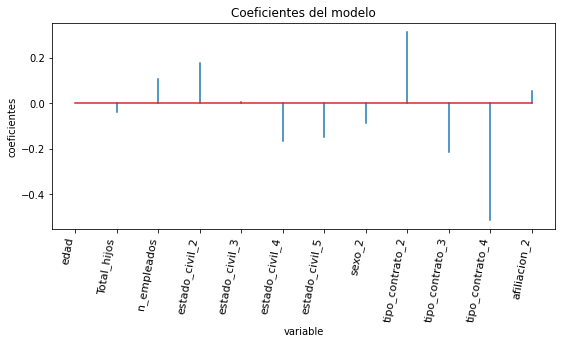

In [691]:
df_coeficientes = pd.DataFrame( {'predictor': X_train.columns,
                         'coef': regresion.coef_.flatten()})

fig, ax = plt.subplots(figsize=(9, 3.8))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=80, ha='right', size=11)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [692]:
regresion.intercept_.round(3)

13.029

In [693]:
df_coeficientes.round(3)

,predictor,coef
0,edad,0.003
1,Total_hijos,-0.039
2,n_empleados,0.106
3,estado_civil_2,0.175
4,estado_civil_3,0.005
5,estado_civil_4,-0.169
6,estado_civil_5,-0.150
7,sexo_2,-0.090
8,tipo_contrato_2,0.313
9,tipo_contrato_3,-0.216


## Punto 9

> $Log(y_{salario})=13.029+0.003x_{edad}-0.039x_{totalhijos}+0.106x_{empleados}+0.175x_{estado2} -0.005x_{estado3}-0.169x_{estado4}-0.150x_{estado5}-0.090x_{sexo2}+0.313x_{contrado2}-0.216x_{contrato3}-0.514x_{contrato4}+0.054x_{afilicación}$ 




















Conforme a las estimaciones obtenidas en el modelo se considera que cuando la cantidad de años o edad de un individuo aumenta en una unidad, se estima que el salario devengado por el mismo aumenta en un 0.136%, manteniendo las demás variables constantes. Así mismo, cuando el total de hijos de la persona aumenta una unidad, se espera que el salario disminuya en un 3.92%, siempre y cuando las demás variables permanezcan constantes. 
Ahora bien, si el enfoque es el numero de empleados que maneja la empresa a la cual pertenece el individuo, y si dicha cantidad de empleados aumenta en una unidad se estima que el salario aumenta en 12.25%, manteniendo las demás variables constantes.

Por otra parte, específicamente el estado civil, estima que cuando la persona o empleado ese encuentra Casado, se espera que el salario aumente en 15.03% en comparación con las personas que se encuentran en Unión libre. De forma similar ocurre con los individuos que se encuentran Separados, solo que en este caso el salario disminuye en 4.697%. Para las personas que se encuentran viudas, el salario disminuye un 13.66% en comparación a las personas que mantienen una relación en unión libre. Y finalmente Las personas solteras, en comparación a las que están en estad de unión libre, su salario disminuye en 14.46%. Teniendo en cuenta dichas variaciones siempre y cuando las demás variables se mantengan constantes. 

Otro factor influyente es el tipo de contrato, donde los individuos que cuentan con un contrato indefinido se estima que el salario devengado aumente en 25.35% en comparación de las personas con un salario fijo. Así mismo, las personas que que trabajan bajo un contrato verbal, tiene un efecto de decrecimiento en su salario en un 33.20% en comparación al contrato fijo. En el caso de los individuos  que no tiene un contrato laboral, se estima que su salario disminuye en un 53.82% en comparación a tener un contrato fijo. Lo anterior, siempre y cuando las demás variables se mantengan constantes.

Por ultimo, se aprecia que cuando una persona no se encuentra afiliada a salud, se espera que su salario aumente en 37.72%, en comparación a las estar a filiado a salud y manteniendo las demás variables constantes.

In [694]:
0.00136*100

0.136

In [695]:
0.15*100

15.0

In [696]:
0.0830*100

8.3

# Bonus
## 1)


In [697]:
from scipy.stats import t  
import numpy as np

In [698]:
n, p = X_train.shape
b = np.append(regresion.intercept_,regresion.coef_)

In [699]:
alpha = .05 
Sigma_2 = ((y_train - regresion.predict(X_train)) ** 2).sum()/(n - p - 1) 
X_train.insert(0,"Bo",1)
VAR_betas = Sigma_2*np.linalg.inv(np.transpose(X_train).dot(X_train)) 
EE = VAR_betas.diagonal()
t = -t.ppf(alpha/2,n-p-1) ; t

1.9614267148318367

In [700]:
IC = pd.DataFrame({"LI": b - t*np.sqrt(EE) , "LS": b + t*np.sqrt(EE)}) 

In [701]:
Intercepto = pd.DataFrame({"predictor":["Intercepto"]})
Nombres = pd.DataFrame(df_coeficientes["predictor"]) 
datas = [Intercepto, Nombres]
Coeficientes = pd.concat(datas,ignore_index=True) 

In [702]:
datas = [Coeficientes,IC] 
IC = pd.concat(datas,axis=1,ignore_index=True) 

In [703]:
IC.rename(columns={0:'Parámetro', 1:'Límite inferior', 2:'Límite superior'})

,Parámetro,Límite inferior,Límite superior
0,Intercepto,12.819172,13.239417
1,edad,-0.001088,0.006223
2,Total_hijos,-0.075393,-0.002699
3,n_empleados,0.081686,0.130112
4,estado_civil_2,0.091088,0.258866
5,estado_civil_3,-0.105090,0.114616
6,estado_civil_4,-0.410787,0.073157
7,estado_civil_5,-0.290101,-0.009003
8,sexo_2,-0.183977,0.004669
9,tipo_contrato_2,0.220759,0.404879


Como se observa para los diferentes intervalos de confianza, el intercepto y los parámetros asociados las variables totales de hijos, numero de empleados, casados, soltero, contrato escrito a termino indefinido, contrato verbal y no tiene contrato resultaron significativos, es decir, son estadísticamente diferentes de cero, encontraparte, encontramos que los parametros asociaciones a las variables edad, separado o divorciado, viudo, sexo y afiliación resultaron no significativos.

## 2)

In [704]:
y_real = salario10
y_estimado = regresion.predict(Explicativas10) 
metricas(y_real,y_estimado)

Error Cuadratico Medio: 0.4625571502427796
Error Absoluto Medio: 0.4821123441892571
Raíz del error cuadrático medio: 0.6801155418329885
